In [35]:
#import dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv
import numpy as np


from datetime import datetime

# Import VADER analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())




In [30]:
#Define list of Twitter handles

news_users = ("BBCNews", "FoxNews", "cbsnews", "CNN", "nytimes")

# List for dictionaries of results
# results_list = []


In [31]:
# Variable for holding timestamp
name_list=[]
timestamp_list = []
converted_timestamps = []

#variable for holding tweet text 
text_list = []

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

#Variable for holding looped counters
counter_list=[]



In [32]:
#set up 

user_results = []
oldest_tweet = None

# Loop through each user
  
for user in news_users:
    #Start counter - will reloop on next user 
    counter = 0 
    # Get 100 tweets from home feed
    public_tweets = api.user_timeline(user, result_type ="recent", count=100)

    # Loop through all tweets
    for tweet in public_tweets:
            
        #Get news org name
        name = (tweet["user"]["name"])
            
        #get raw timestamp
        raw_timestamp=(tweet["created_at"])
        converted_time = datetime.strptime(raw_timestamp, "%a %b %d %H:%M:%S %z %Y")
            
        tweet_text = (tweet["text"])
                            
        # Perform a sentiment analysis with the compound, positive, neutral, and 
        # negative scoring for each tweet.
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
        #Up the counter 
        counter += 1

        # Add each value to the appropriate list
            
        name_list.append(name)
        timestamp_list.append(converted_time )
        text_list.append(tweet_text)
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        counter_list.append(counter)
            
            # Create a dictionary of results

        user_results = {"Username": name_list,
                        "Timestamp": timestamp_list,
                        "Tweet Text" : text_list,
                        "Compound Score": compound_list,
                        "Postive Score": positive_list,
                        "Neutral Score": neutral_list,
                        "Negative Score": negative_list, 
                        "Counter" : counter_list
                        }
        
# * Pull into a DataFrame the tweet's source account, its text, its date, and 
# its compound, positive, neutral, and negative sentiment scores.
            
            
data_final = pd.DataFrame(user_results)

data_final



,Username,Timestamp,Tweet Text,Compound Score,Postive Score,Neutral Score,Negative Score,Counter
0,BBC News (UK),2018-10-04 03:24:42+00:00,Westlife reunite for new music and tour https:...,0.0000,0.000,1.000,0.000,1
1,BBC News (UK),2018-10-04 03:13:22+00:00,"South Carolina: Seven officers shot, suspect i...",-0.2960,0.000,0.784,0.216,2
2,BBC News (UK),2018-10-04 02:50:55+00:00,RT @SallyBundockBBC: The device/tablet - the c...,0.0000,0.000,1.000,0.000,3
3,BBC News (UK),2018-10-04 02:41:38+00:00,Britain could bid for football and rugby World...,0.0000,0.000,1.000,0.000,4
4,BBC News (UK),2018-10-04 02:33:58+00:00,Can my brain cure my back pain? https://t.co/c...,-0.5106,0.000,0.680,0.320,5
5,BBC News (UK),2018-10-04 02:29:59+00:00,We lived in a single mum commune https://t.co/...,0.0000,0.000,1.000,0.000,6
6,BBC News (UK),2018-10-04 02:14:15+00:00,The photograph that shaped a career https://t....,0.0000,0.000,1.000,0.000,7
7,BBC News (UK),2018-10-04 01:59:18+00:00,UK accuses Russia's GRU military intelligence ...,-0.2960,0.201,0.455,0.344,8
8,BBC News (UK),2018-10-04 00:57:09+00:00,United Airlines flight lands safely after mayd...,0.7184,0.462,0.538,0.000,9
9,BBC News (UK),2018-10-04 00:45:46+00:00,Second Brit dies after 'Brazilian butt lift' s...,0.0000,0.000,1.000,0.000,10


In [28]:
# Export the data in the DataFrame into a CSV file.
data_final.to_csv("tweetdata.csv")


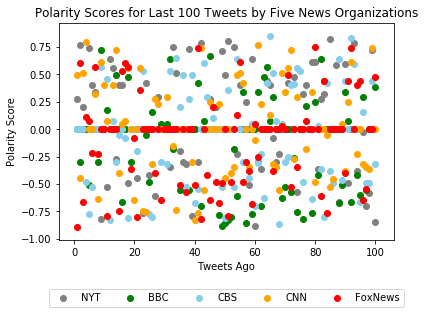

In [48]:
# # The first plot will be and/or feature the following:
# # * Be a scatter plot of sentiments of the last **100** tweets sent out
# by each news organization, ranging from -1.0 to 1.0, where a score of 0 
# expresses a neutral sentiment, -1 the most negative sentiment possible, 
# and +1 the most positive sentiment possible.
# # # * Each plot point will reflect the _compound_ sentiment of a tweet.
# # # * Sort each plot point by its relative timestamp.

fig = plt.subplots

NYTimes_data = data_final[(data_final["Username"]=="The New York Times")]
BBC_data = data_final[(data_final["Username"]=="BBC News (UK)")]
CBS_data = data_final[(data_final["Username"]=="CBS News")]
CNN_data = data_final[(data_final["Username"]=="CNN")]
FoxNews_data = data_final[(data_final["Username"]=="Fox News")]


plt.scatter(NYTimes_data["Counter"], NYTimes_data["Compound Score"], label = "NYT", color = "gray")
plt.scatter(BBC_data["Counter"], BBC_data["Compound Score"], label = "BBC", color = "green")
plt.scatter(CBS_data["Counter"], CBS_data["Compound Score"], label = "CBS", color = "skyblue")
plt.scatter(CNN_data["Counter"], CNN_data["Compound Score"], label = "CNN", color = "orange")
plt.scatter(FoxNews_data["Counter"], FoxNews_data["Compound Score"], label = "FoxNews", color = "red")

plt.legend(frameon=True, labels = ["NYT", "BBC", "CBS", "CNN", "FoxNews"], title="News Org")
# fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.ylabel("Polarity Score")
plt.xlabel("Tweets Ago")
plt.title("Polarity Scores for Last 100 Tweets by Five News Organizations")

plt.show()

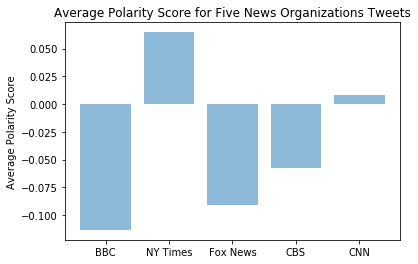

In [38]:
# The second plot will be a bar plot visualizing the
# _overall_ sentiments of the last 100 tweets from each organization. 
# For this plot, you will again aggregate the compound sentiments 
# analyzed by VADER.

BBC_mean = np.mean(BBC_data["Compound Score"])
NYTimes_mean = np.mean(NYTimes_data["Compound Score"])
FoxNews_mean = np.mean(FoxNews_data["Compound Score"])
CBS_mean = np.mean(CBS_data["Compound Score"])
CNN_mean = np.mean(CNN_data["Compound Score"])

labels = ("BBC", "NY Times", "Fox News", "CBS", "CNN")
colors = ()

y_pos = np.arange(len(labels))
performance = [BBC_mean, NYTimes_mean,FoxNews_mean, CBS_mean, CNN_mean]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel("Average Polarity Score")
plt.title("Average Polarity Score for Five News Organizations Tweets")
 
plt.show()

In [ ]:
# * Save PNG images for each plot.